### Project 1: Predicting Stock Market Movements with Tweets and Financial Metrics

In [1]:
import findspark
findspark.init()

In [2]:
# IMPORTS
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pandas as pd
import psycopg2

In [3]:
#MongoDB Connection
mongo_uri = "mongodb://localhost:27017/Stock_Tweets_Project"

# Init Spark Session 
spark = SparkSession.builder \
    .appName("StockTweetsAnalysis") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1") \
    .getOrCreate()

# Loading data from MongoDB into a PySpark DataFrame
stock_tweets = spark.read.format("mongo") \
    .option("uri", mongo_uri) \
    .option("database", "Stock_Tweets_Project") \
    .option("collection", "Stock_Tweets_New") \
    .load()

# Show some records to verify data has been loaded from MongoDB
print("Data loaded from MongoDB:")
stock_tweets.show(10)

Data loaded from MongoDB:
+-------------------+--------------------+------+------+--------------------+
|               Date|                 _id|    id|ticker|               tweet|
+-------------------+--------------------+------+------+--------------------+
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100001|  AMZN|$AMZN Dow futures...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100002|  TSLA|$TSLA Daddy's dri...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100003|  AAPL|$AAPL We’ll been ...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100004|  TSLA|$TSLA happy new y...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100005|  TSLA|$TSLA haha just a...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100006|  TSLA|$TSLA NOBODY: Gas...|
|2020-01-02 00:00:00|{67101c659fa7a7c3...|100007|  AAPL|$AAPL $300 calls ...|
|2020-01-02 00:00:00|{67101c659fa7a7c3...|100008|  AAPL|$AAPL Remember, i...|
|2020-01-02 00:00:00|{67101c659fa7a7c3...|100009|  AAPL|$AAPL called it, ...|
|2020-01-02 00:00:00|{67101c659fa7a7c3

In [4]:
stock_tweets.count()

10000

In [5]:
# PostgreSQL Connection
conn = psycopg2.connect(
    host='localhost',
    database='stock_data',
    user='postgres',
    password='Bigdata@2024'
)
cur = conn.cursor()
# SQL query 
query = "SELECT * FROM stock_prices"
# Executing the query
cur.execute(query)
rows = cur.fetchall()
colnames = [desc[0] for desc in cur.description]
df_postgres = pd.DataFrame(rows, columns=colnames)
cur.close()
conn.close()
stock_prices= spark.createDataFrame(df_postgres)
stock_prices.show(10)

+-----+----------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+------+
|   id|      date|                open|                high|                 low|               close|           adj_close|   volume|ticker|
+-----+----------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+------+
|40701|2019-12-31|72.48249816894531...|73.41999816894531...|72.37999725341797...|73.41249847412110...|71.52082061767578...|100805600|  AAPL|
|40702|2020-01-02|74.05999755859375...|75.15000152587890...|73.79750061035156...|75.08750152587890...|73.15264892578125...|135480400|  AAPL|
|40703|2020-01-03|74.28749847412110...|75.14499664306640...|74.12500000000000...|74.35749816894531...|72.44145965576172...|146322800|  AAPL|
|40704|2020-01-06|73.44750213623047...|74.98999786376953...|73.18750000000000...|74.94999694824219...|73.01867675781250...|118387200|  AAPL|
|40705|2020-0

In [6]:
print(f'No of Tweets: {stock_tweets.count()}, No of Stock Prices: {stock_prices.count()}')


No of Tweets: 10000, No of Stock Prices: 10175


In [7]:
stock_tweets.printSchema()
stock_prices.printSchema()


root
 |-- Date: timestamp (nullable = true)
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- ticker: string (nullable = true)
 |-- tweet: string (nullable = true)

root
 |-- id: long (nullable = true)
 |-- date: date (nullable = true)
 |-- open: decimal(38,18) (nullable = true)
 |-- high: decimal(38,18) (nullable = true)
 |-- low: decimal(38,18) (nullable = true)
 |-- close: decimal(38,18) (nullable = true)
 |-- adj_close: decimal(38,18) (nullable = true)
 |-- volume: long (nullable = true)
 |-- ticker: string (nullable = true)



In [8]:
stock_tweets.select('date').show(5)
stock_prices.select('date').show(5)

+-------------------+
|               date|
+-------------------+
|2020-01-01 00:00:00|
|2020-01-01 00:00:00|
|2020-01-01 00:00:00|
|2020-01-01 00:00:00|
|2020-01-01 00:00:00|
+-------------------+
only showing top 5 rows

+----------+
|      date|
+----------+
|2019-12-31|
|2020-01-02|
|2020-01-03|
|2020-01-06|
|2020-01-07|
+----------+
only showing top 5 rows



In [9]:
stock_tweets.show(5)

+-------------------+--------------------+------+------+--------------------+
|               Date|                 _id|    id|ticker|               tweet|
+-------------------+--------------------+------+------+--------------------+
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100001|  AMZN|$AMZN Dow futures...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100002|  TSLA|$TSLA Daddy's dri...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100003|  AAPL|$AAPL We’ll been ...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100004|  TSLA|$TSLA happy new y...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100005|  TSLA|$TSLA haha just a...|
+-------------------+--------------------+------+------+--------------------+
only showing top 5 rows



In [10]:
# from pyspark.sql.functions import to_date

# # Convert 'date' column in both DataFrames to a common format (YYYY-MM-DD)
# stock_tweets = stock_tweets.withColumn('date', to_date(col('date'), 'dd-MM-yyyy'))
# stock_prices = stock_prices.withColumn('date', to_date(col('date'), 'yyyy-MM-dd'))


In [11]:
stock_tweets.show(5)

+-------------------+--------------------+------+------+--------------------+
|               Date|                 _id|    id|ticker|               tweet|
+-------------------+--------------------+------+------+--------------------+
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100001|  AMZN|$AMZN Dow futures...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100002|  TSLA|$TSLA Daddy's dri...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100003|  AAPL|$AAPL We’ll been ...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100004|  TSLA|$TSLA happy new y...|
|2020-01-01 00:00:00|{67101c659fa7a7c3...|100005|  TSLA|$TSLA haha just a...|
+-------------------+--------------------+------+------+--------------------+
only showing top 5 rows



In [12]:
stock_prices.show(5)

+-----+----------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+------+
|   id|      date|                open|                high|                 low|               close|           adj_close|   volume|ticker|
+-----+----------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+------+
|40701|2019-12-31|72.48249816894531...|73.41999816894531...|72.37999725341797...|73.41249847412110...|71.52082061767578...|100805600|  AAPL|
|40702|2020-01-02|74.05999755859375...|75.15000152587890...|73.79750061035156...|75.08750152587890...|73.15264892578125...|135480400|  AAPL|
|40703|2020-01-03|74.28749847412110...|75.14499664306640...|74.12500000000000...|74.35749816894531...|72.44145965576172...|146322800|  AAPL|
|40704|2020-01-06|73.44750213623047...|74.98999786376953...|73.18750000000000...|74.94999694824219...|73.01867675781250...|118387200|  AAPL|
|40705|2020-0

In [13]:
# Show distinct tickers in stock_tweets
print("Distinct tickers in stock_tweets:")
stock_tweets.select('ticker').distinct().show(truncate=False)

Distinct tickers in stock_tweets:
+------+
|ticker|
+------+
|TSM   |
|AAPL  |
|XOM   |
|CCL   |
|JPM   |
|DIS   |
|TSLA  |
|PG    |
|MCD   |
|AMT   |
|V     |
|PFE   |
|GOOG  |
|NFLX  |
|FB    |
|UNH   |
|JNJ   |
|CVX   |
|ABNB  |
|BRK.B |
+------+
only showing top 20 rows



In [14]:
# Show distinct tickers in stock_prices
print("Distinct tickers in stock_prices:")
stock_prices.select('ticker').distinct().show(truncate=False)


Distinct tickers in stock_prices:
+------+
|ticker|
+------+
|AAPL  |
|AMT   |
|ABNB  |
|BA    |
|AMZN  |
|BRK-A |
|BRK-B |
|BAC   |
|BABA  |
|BKNG  |
|CCL   |
|DIS   |
|FB    |
|CVX   |
|JPM   |
|GOOG  |
|JNJ   |
|GSPC  |
|GOOGL |
|LOW   |
+------+
only showing top 20 rows



In [15]:
# Trim ticker values in both DataFrames
stock_tweets_trimmed = stock_tweets.withColumn('ticker', regexp_replace(col('ticker'), ' ', ''))
stock_prices_trimmed = stock_prices.withColumn('ticker', regexp_replace(col('ticker'), ' ', ''))

# Check for distinct tickers after trimming
stock_tweets_trimmed.select('ticker').distinct().show(truncate=False)
stock_prices_trimmed.select('ticker').distinct().show(truncate=False)


+------+
|ticker|
+------+
|TSM   |
|AAPL  |
|XOM   |
|CCL   |
|JPM   |
|DIS   |
|TSLA  |
|PG    |
|MCD   |
|AMT   |
|V     |
|PFE   |
|GOOG  |
|NFLX  |
|FB    |
|UNH   |
|JNJ   |
|CVX   |
|ABNB  |
|BRK.B |
+------+
only showing top 20 rows

+------+
|ticker|
+------+
|AAPL  |
|AMT   |
|ABNB  |
|BA    |
|AMZN  |
|BRK-A |
|BRK-B |
|BAC   |
|BABA  |
|BKNG  |
|CCL   |
|DIS   |
|FB    |
|CVX   |
|JPM   |
|GOOG  |
|JNJ   |
|GSPC  |
|GOOGL |
|LOW   |
+------+
only showing top 20 rows



In [16]:
# Count null values in the date column of stock_tweets
null_dates_tweets = stock_tweets.filter(col('date').isNull()).count()
print(f"Number of null dates in stock_tweets: {null_dates_tweets}")

# Count null values in the date column of stock_prices
null_dates_prices = stock_prices.filter(col('date').isNull()).count()
print(f"Number of null dates in stock_prices: {null_dates_prices}")


Number of null dates in stock_tweets: 0
Number of null dates in stock_prices: 0


In [17]:
# Renaming Columns; This will help in joining the tables and drop one column after successful join
stock_prices = stock_prices \
    .withColumnRenamed('ticker', 'price_ticker') \
    .withColumnRenamed('date', 'price_date')

stock_prices.printSchema()
stock_prices.show(5)

root
 |-- id: long (nullable = true)
 |-- price_date: date (nullable = true)
 |-- open: decimal(38,18) (nullable = true)
 |-- high: decimal(38,18) (nullable = true)
 |-- low: decimal(38,18) (nullable = true)
 |-- close: decimal(38,18) (nullable = true)
 |-- adj_close: decimal(38,18) (nullable = true)
 |-- volume: long (nullable = true)
 |-- price_ticker: string (nullable = true)

+-----+----------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+------------+
|   id|price_date|                open|                high|                 low|               close|           adj_close|   volume|price_ticker|
+-----+----------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+------------+
|40701|2019-12-31|72.48249816894531...|73.41999816894531...|72.37999725341797...|73.41249847412110...|71.52082061767578...|100805600|        AAPL|
|40702|2020-01-02|74.05999755

In [18]:
#joining the datasets
integrated_df = stock_prices.join(stock_tweets, 
                                           (stock_tweets.ticker == stock_prices.price_ticker) & 
                                           (stock_tweets.Date == stock_prices.price_date), 
                                           'inner')

# Check the count of the integrated dataset
integrated_count = integrated_df.count()
print(f"Number of records in the integrated Dataset: {integrated_count}")


Number of records in the integrated Dataset: 9619


In [19]:
integrated_df.show(5)

+-----+----------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+------------+-------------------+--------------------+------+------+--------------------+
|   id|price_date|                open|                high|                 low|               close|           adj_close|   volume|price_ticker|               Date|                 _id|    id|ticker|               tweet|
+-----+----------+--------------------+--------------------+--------------------+--------------------+--------------------+---------+------------+-------------------+--------------------+------+------+--------------------+
|40740|2020-02-27|70.27500152587890...|71.50000000000000...|68.23999786376953...|68.37999725341797...|66.77608489990234...|320605600|        AAPL|2020-02-27 00:00:00|{67101c659fa7a7c3...|100972|  AAPL|$AAPL market migh...|
|41023|2020-03-18|210.0000000000000...|235.8399963378906...|206.1699981689453...|217.1399993896484...|196.91

##### Cleaning Tweets

In [20]:
from pyspark.sql import functions as F
from pyspark.sql.functions import lower, regexp_replace, trim


missing_values = integrated_df.select([F.count(F.when(F.col("tweet").isNull(), "tweet")).alias("missing_tweet_content")])
missing_values.show()


integrated_df = integrated_df.withColumn("tweet", lower(F.col("tweet"))) \
                              .withColumn("tweet", regexp_replace(F.col("tweet"), '[^a-zA-Z0-9\\s]', '')) \
                              .withColumn("tweet", trim(F.col("tweet")))


+---------------------+
|missing_tweet_content|
+---------------------+
|                    0|
+---------------------+



There are no null values.

In [21]:
# Drop some irrelevant columns
columns_to_drop = ['_id', 'id', 'ticker', 'Date']
integrated_df = integrated_df.drop(*columns_to_drop)
# renaming columns to be descriptive
integrated_df = integrated_df \
    .withColumnRenamed('price_date', 'Date') \
    .withColumnRenamed('open', 'Opening_Price') \
    .withColumnRenamed('high', 'Highest_Price') \
    .withColumnRenamed('low', 'Lowest_Price') \
    .withColumnRenamed('close', 'Closing_Price') \
    .withColumnRenamed('adj_close', 'Adjusted_Closing_Price') \
    .withColumnRenamed('volume', 'Traded_Volume') \
    .withColumnRenamed('price_ticker', 'Ticker_Symbol') \
    .withColumnRenamed('tweet', 'Tweet_Content')
integrated_df.printSchema()
integrated_df.show(5)

root
 |-- Date: date (nullable = true)
 |-- Opening_Price: decimal(38,18) (nullable = true)
 |-- Highest_Price: decimal(38,18) (nullable = true)
 |-- Lowest_Price: decimal(38,18) (nullable = true)
 |-- Closing_Price: decimal(38,18) (nullable = true)
 |-- Adjusted_Closing_Price: decimal(38,18) (nullable = true)
 |-- Traded_Volume: long (nullable = true)
 |-- Ticker_Symbol: string (nullable = true)
 |-- Tweet_Content: string (nullable = true)

+----------+--------------------+--------------------+--------------------+--------------------+----------------------+-------------+-------------+--------------------+
|      Date|       Opening_Price|       Highest_Price|        Lowest_Price|       Closing_Price|Adjusted_Closing_Price|Traded_Volume|Ticker_Symbol|       Tweet_Content|
+----------+--------------------+--------------------+--------------------+--------------------+----------------------+-------------+-------------+--------------------+
|2020-02-27|70.27500152587890...|71.50000000000

#### VADER analyzer

In [22]:
from pyspark.sql.functions import udf, col
from pyspark.sql.types import FloatType
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

def safe_vader_sentiment(text):
    if text is None or len(text.strip()) == 0:
        return 0.0  
    try:
        sentiment_dict = analyzer.polarity_scores(text)
        return sentiment_dict['compound']
    except Exception as e:
        print(f"Error processing text: {text}, Error: {str(e)}")
        return 0.0  

vader_udf = udf(safe_vader_sentiment, FloatType())
integrated_df = integrated_df.withColumn('sentiment', vader_udf(col('Tweet_Content')))
integrated_df.select('Tweet_Content', 'sentiment').show(5)


+--------------------+---------+
|       Tweet_Content|sentiment|
+--------------------+---------+
|aapl market might...|  -0.2584|
|amt false flag lo...|      0.0|
|tsla there are st...|      0.0|
|tsla unless this ...|     0.34|
|tsla what an infl...|  -0.4767|
+--------------------+---------+
only showing top 5 rows



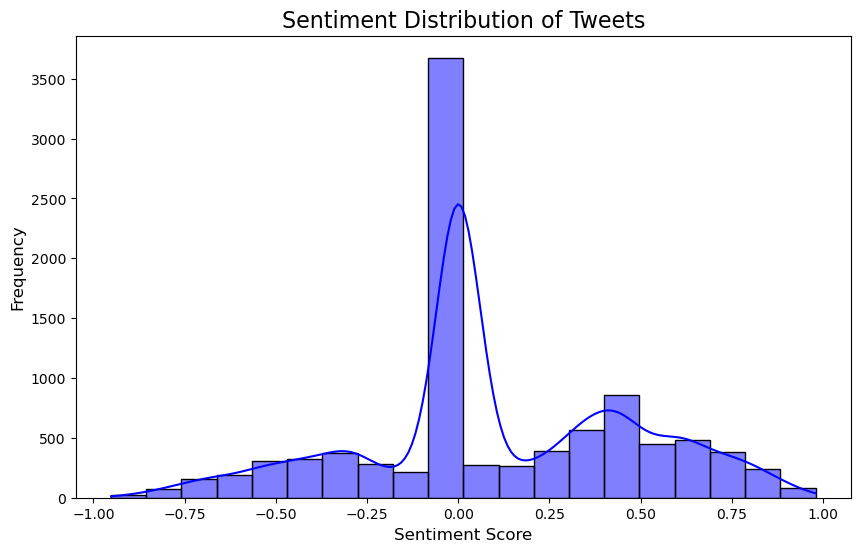

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sentiment_df = integrated_df.select('Tweet_Content', 'sentiment').toPandas()

plt.figure(figsize=(10, 6))
sns.histplot(sentiment_df['sentiment'], bins=20, kde=True, color="blue")

plt.title('Sentiment Distribution of Tweets', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


### Data Visualization

In [24]:
import plotly.graph_objects as go
integrated_pd_df = integrated_df.toPandas()
integrated_pd_df['Date'] = pd.to_datetime(integrated_pd_df['Date'])
# SAVING THE DATAFRAME TO CSV for deployment
integrated_pd_df.to_csv('joined_df.csv', index=False)

integrated_pd_df['Date'] = pd.to_datetime(integrated_pd_df['Date'])  
integrated_pd_df.set_index('Date', inplace=True) 
# specify ticker
ticker='TSLA'

integrated_pd_df = integrated_pd_df[integrated_pd_df['Ticker_Symbol'] == ticker]
integrated_pd_df['Closing_Price'] = pd.to_numeric(integrated_pd_df['Closing_Price'], errors='coerce')
integrated_pd_df.dropna(subset=['Closing_Price'], inplace=True)


# Count tweets per day
tweet_counts = integrated_pd_df.groupby('Date').size().reset_index(name='Tweet_Count')

# Create a line chart for tweet counts
line_chart = go.Figure(data=go.Scatter(x=tweet_counts['Date'],
                                        y=tweet_counts['Tweet_Count'],
                                        mode='lines+markers',
                                        name='Tweet Count'))

line_chart.update_layout(title='Tweet Count Over Time',
                          xaxis_title='Date',
                          yaxis_title='Number of Tweets')

line_chart.show()

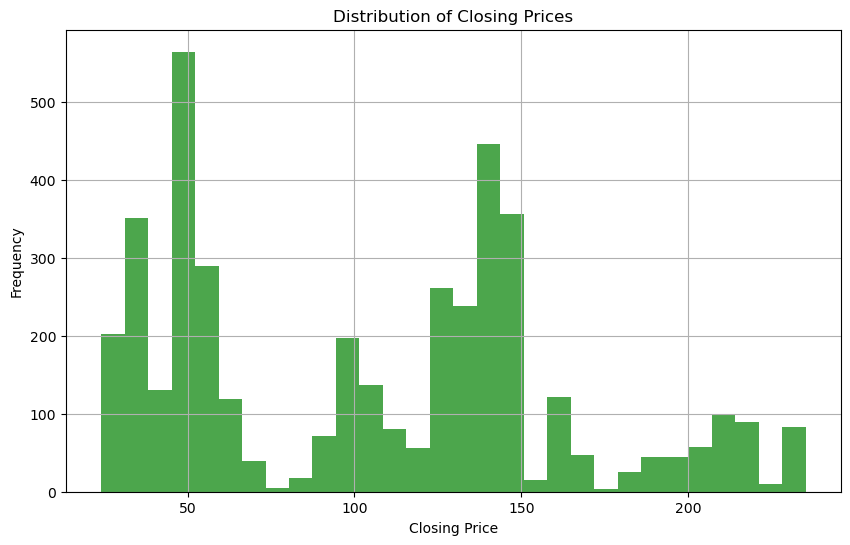

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(integrated_pd_df['Closing_Price'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

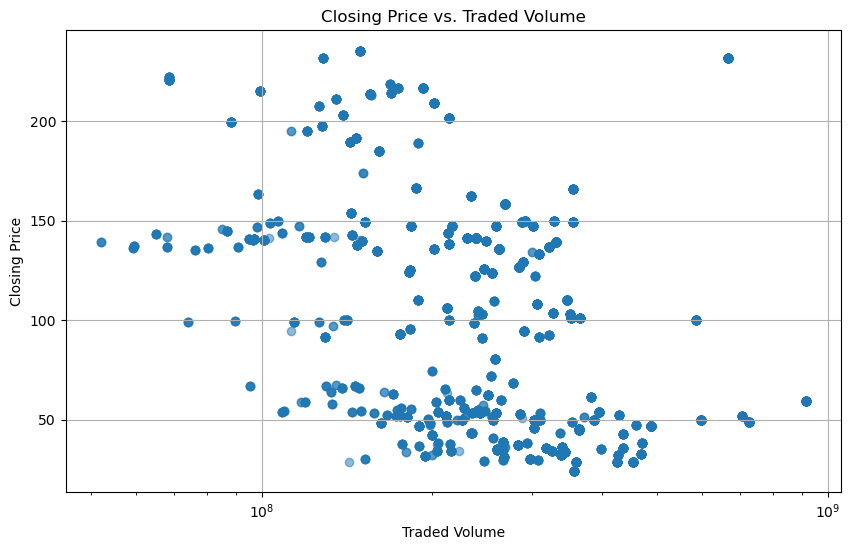

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(integrated_pd_df['Traded_Volume'], integrated_pd_df['Closing_Price'], alpha=0.5)
plt.title('Closing Price vs. Traded Volume')
plt.xlabel('Traded Volume')
plt.ylabel('Closing Price')
plt.xscale('log')  # this is to enhance visibility
plt.grid()
plt.show()

In [27]:
# Opening Price With Time
line_chart = go.Figure(data=go.Scatter(x=tweet_counts['Date'],
                                        y=integrated_pd_df['Opening_Price'],
                                        mode='lines+markers',
                                        name='Opening Price'))

line_chart.update_layout(title='Opening Price Over Time',
                          xaxis_title='Date',
                          yaxis_title='Opening Price')

line_chart.show()


In [28]:
#closing price over time
line_chart = go.Figure(data=go.Scatter(x=tweet_counts['Date'],
                                        y=integrated_pd_df['Closing_Price'],
                                        mode='lines+markers',
                                        name='Closing Price'))
line_chart.update_layout(title='Closing Price Over Time',
                          xaxis_title='Date',
                          yaxis_title='Closing Price')
line_chart.show()

### Modelling

#### ARIMA

Checking stationarity of the 'Closing_Price' series...
ADF Statistic: -0.20016939082427007
p-value: 0.938501423483322
Data differenced to achieve stationarity.
            Closing_Price  Differenced_Closing_Price
Date                                                
2020-01-02      75.087502                        NaN
2020-01-03      74.357498                  -0.730003
2020-01-06      74.949997                   0.592499
2020-01-07      74.597504                  -0.352493
2020-01-08      75.797501                   1.199997


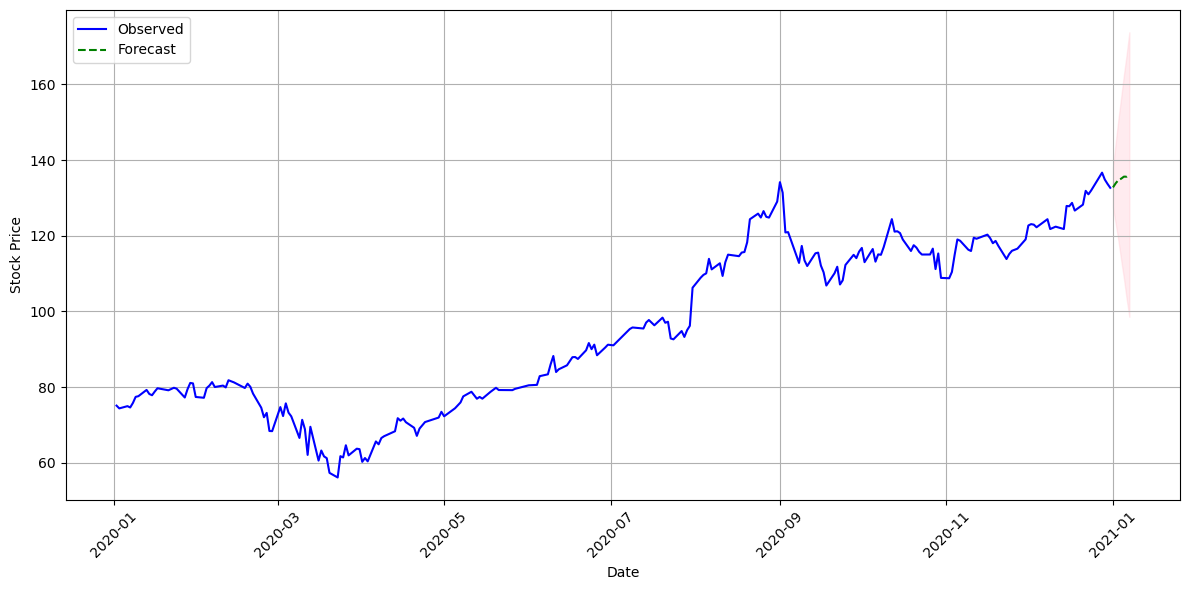

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

class StockPriceForecaster:
    def __init__(self, data):
        self.data = data
        self.model = None
        self.results = None

    def check_stationarity(self, timeseries):
        """Perform Dickey-Fuller test to check for stationarity"""
        result = adfuller(timeseries.dropna(), autolag='AIC')  
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        return 'Stationary' if result[1] < 0.05 else 'Non-Stationary'

    def preprocess_data(self):
        """Preprocess data by removing duplicates, sorting by date, and differencing to make stationary"""
        
        # Remove duplicates by index and sort data by Date
        self.data = self.data[~self.data.index.duplicated(keep='first')]
        self.data = self.data.sort_index()

        # Interpolate any missing values in the 'Closing_Price' column
        self.data['Closing_Price'].interpolate(method='linear', inplace=True)

        # Check if the series is stationary
        print("Checking stationarity of the 'Closing_Price' series...")
        stationarity = self.check_stationarity(self.data['Closing_Price'])
        
        if stationarity == 'Non-Stationary':
            # Differencing to make the data stationary
            self.data['Differenced_Closing_Price'] = self.data['Closing_Price'].diff().dropna()
            print("Data differenced to achieve stationarity.")
        else:
            self.data['Differenced_Closing_Price'] = self.data['Closing_Price']
        
        print(self.data.head())

    def train_sarima_model(self, p=1, d=1, q=1, P=1, D=1, Q=1, s=7):
        """Train SARIMAX model with specified parameters"""
        # Ensure the differenced data is used for SARIMA
        self.model = SARIMAX(self.data['Differenced_Closing_Price'], 
                             order=(p, d, q), 
                             seasonal_order=(P, D, Q, s))
        self.results = self.model.fit()

    def forecast(self, steps=7):
        """Forecast the next 'steps' days"""
        forecast = self.results.get_forecast(steps=steps)

        # If differenced, re-integrate predictions
        if 'Differenced_Closing_Price' in self.data.columns:
            forecast_mean = forecast.predicted_mean.cumsum() + self.data['Closing_Price'].iloc[-1]
            forecast_ci = forecast.conf_int().cumsum() + self.data['Closing_Price'].iloc[-1]
        else:
            forecast_mean = forecast.predicted_mean
            forecast_ci = forecast.conf_int()

        # Generate forecast dates
        forecast_dates = pd.date_range(start=self.data.index[-1], periods=steps + 1, inclusive='right')

        # Plotting the forecast
        plt.figure(figsize=(12, 6))
        plt.plot(self.data.index, self.data['Closing_Price'], label='Observed', color='blue')
        plt.plot(forecast_dates, forecast_mean, label='Forecast', color='green', linestyle='--')
        plt.fill_between(forecast_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
        plt.xlabel("Date")
        plt.ylabel("Stock Price")
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()

# Example usage:
data = pd.read_csv('joined_df.csv')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  
data.set_index('Date', inplace=True) 

ticker='AAPL'
filtered_data = data[data['Ticker_Symbol'] == ticker]

data = filtered_data[['Closing_Price']]  # Ensure you are using the correct data
data.index = pd.to_datetime(data.index)  # Convert the index to datetime

forecaster = StockPriceForecaster(data)
forecaster.preprocess_data()  # Preprocessing to clean and prepare data
forecaster.train_sarima_model()  # Training the SARIMA model
forecaster.forecast(steps=7)  # Forecasting the next 7 days


Checking stationarity of the 'Closing_Price' series...
ADF Statistic: -0.20016939082427007
p-value: 0.938501423483322
Data differenced to achieve stationarity.
            Closing_Price  Differenced_Closing_Price
Date                                                
2020-01-02      75.087502                        NaN
2020-01-03      74.357498                  -0.730003
2020-01-06      74.949997                   0.592499
2020-01-07      74.597504                  -0.352493
2020-01-08      75.797501                   1.199997


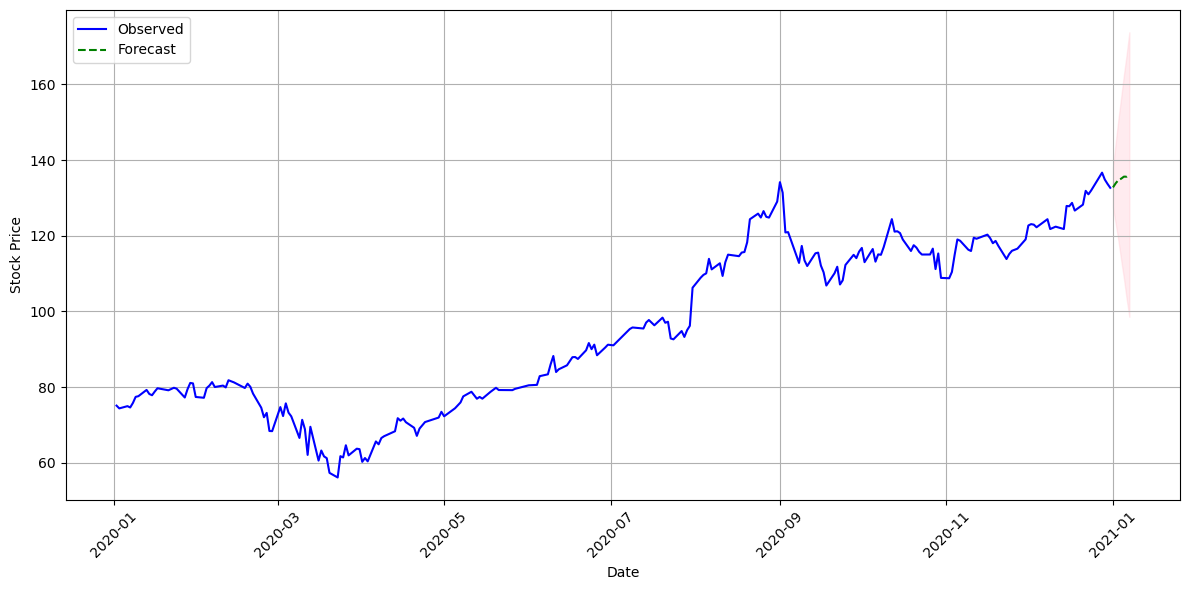

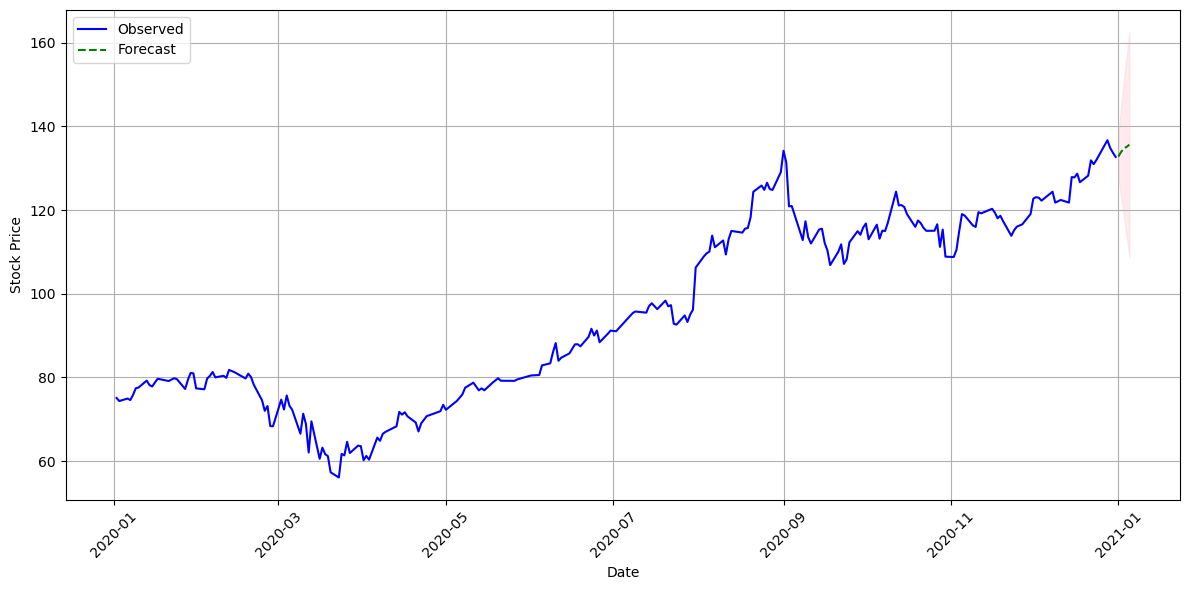

Actual Values: [131.97000122 136.69000244 134.86999512 133.72000122 132.69000244]
Forecasted Mean: [132.79120068 133.88779024 134.75256267 135.09535784 135.63500948]
MAE for 1-Day Forecast: 0.8211994610459783
MAE for 3-Day Forecast: 1.2469480389053444
MAE for 5-Day Forecast: 1.612241553625779


(0.8211994610459783, 1.2469480389053444, 1.612241553625779)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

class StockPriceForecaster:
    def __init__(self, data):
        self.data = data
        self.model = None
        self.results = None

    def check_stationarity(self, timeseries):        
        result = adfuller(timeseries.dropna(), autolag='AIC')  
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        return 'Stationary' if result[1] < 0.05 else 'Non-Stationary'

    def preprocess_data(self):                
      
        self.data = self.data[~self.data.index.duplicated(keep='first')]
        self.data = self.data.sort_index()  
        self.data['Closing_Price'].interpolate(method='linear', inplace=True)
 
        print("Checking stationarity of the 'Closing_Price' series...")
        stationarity = self.check_stationarity(self.data['Closing_Price'])
        
        if stationarity == 'Non-Stationary':
            # Differencing to make the data stationary
            self.data['Differenced_Closing_Price'] = self.data['Closing_Price'].diff().dropna()
            print("Data differenced to achieve stationarity.")
        else:
            self.data['Differenced_Closing_Price'] = self.data['Closing_Price']
        
        print(self.data.head())

    def train_sarima_model(self, p=1, d=1, q=1, P=1, D=1, Q=1, s=7):
        """Train SARIMAX """
        # Ensure the differenced data is used for SARIMA
        self.model = SARIMAX(self.data['Differenced_Closing_Price'], 
                             order=(p, d, q), 
                             seasonal_order=(P, D, Q, s))
        self.results = self.model.fit()

    def forecast(self, steps=7):       
        forecast = self.results.get_forecast(steps=steps)
       
        if 'Differenced_Closing_Price' in self.data.columns:
            forecast_mean = forecast.predicted_mean.cumsum() + self.data['Closing_Price'].iloc[-1]
            forecast_ci = forecast.conf_int().cumsum() + self.data['Closing_Price'].iloc[-1]
        else:
            forecast_mean = forecast.predicted_mean
            forecast_ci = forecast.conf_int()

        # Generate forecast dates
        forecast_dates = pd.date_range(start=self.data.index[-1], periods=steps + 1, inclusive='right')

        # Plotting the forecast
        plt.figure(figsize=(12, 6))
        plt.plot(self.data.index, self.data['Closing_Price'], label='Observed', color='blue')
        plt.plot(forecast_dates, forecast_mean, label='Forecast', color='green', linestyle='--')
        plt.fill_between(forecast_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
        plt.xlabel("Date")
        plt.ylabel("Stock Price")
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()

        return forecast_mean, forecast_dates

    def calculate_mae(self, steps=5):
        """Calculate the MAE for 1, 3, and 5-day forecasts."""
        
        forecast_mean, forecast_dates = self.forecast(steps=steps)   
        actual_values = self.data['Closing_Price'][-steps:].values
 
        forecast_mean = forecast_mean[:steps].values          
        print(f"Actual Values: {actual_values}")
        print(f"Forecasted Mean: {forecast_mean}")

   
        mae_1_day = np.nan
        mae_3_day = np.nan
        mae_5_day = np.nan

        if len(actual_values) >= 1 and len(forecast_mean) >= 1:
            mae_1_day = mean_absolute_error([actual_values[0]], [forecast_mean[0]])
        
        if len(actual_values) >= 3 and len(forecast_mean) >= 3:
            mae_3_day = mean_absolute_error(actual_values[:3], forecast_mean[:3])
        
        if len(actual_values) >= 5 and len(forecast_mean) >= 5:
            mae_5_day = mean_absolute_error(actual_values[:5], forecast_mean[:5])

    
        print(f"MAE for 1-Day Forecast: {mae_1_day}")
        print(f"MAE for 3-Day Forecast: {mae_3_day}")
        print(f"MAE for 5-Day Forecast: {mae_5_day}")

        return mae_1_day, mae_3_day, mae_5_day


data = pd.read_csv('joined_df.csv')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  
data.set_index('Date', inplace=True) 

ticker = 'AAPL'
filtered_data = data[data['Ticker_Symbol'] == ticker]

data = filtered_data[['Closing_Price']]  
data.index = pd.to_datetime(data.index)  

forecaster = StockPriceForecaster(data)
forecaster.preprocess_data()  
forecaster.train_sarima_model()  
forecaster.forecast(steps=7)  
forecaster.calculate_mae(steps=5)  


### LSTM

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.1491
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0027
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.0011
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0010
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0011
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 9.5019e-04
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 9.2830e-04
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0010
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 9.2782e-04
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 8.2199e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━

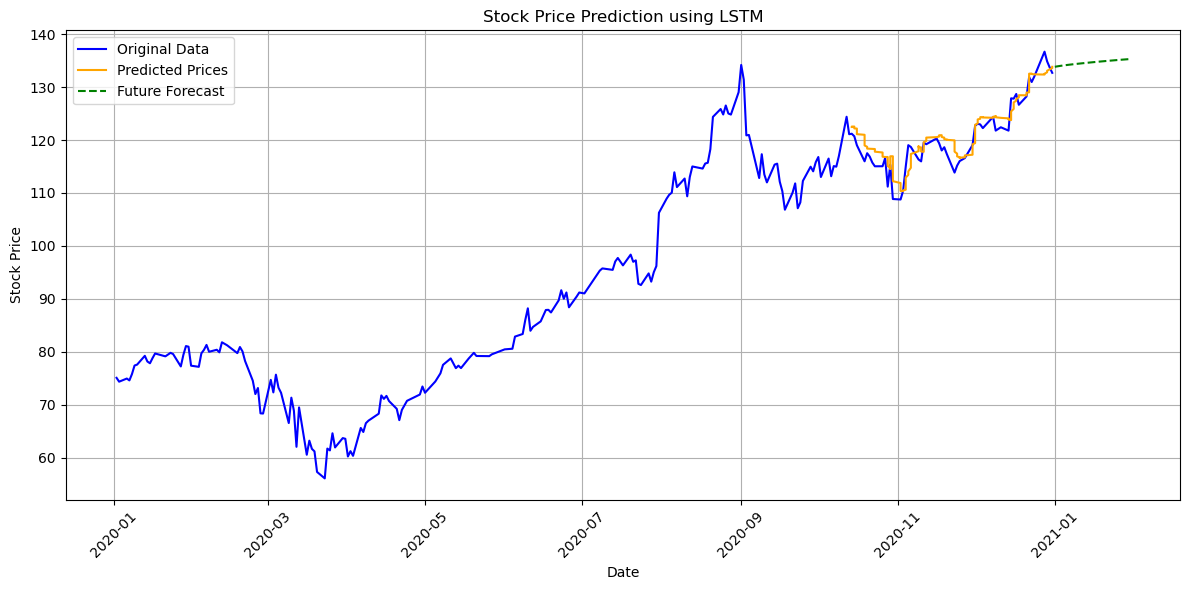

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
MAE for 1-day forecast: 1.0391082763671875
MAE for 3-day forecast: 0.8474782307942709
MAE for 5-day forecast: 1.07154541015625


(1.0391082763671875, 0.8474782307942709, 1.07154541015625)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

class LSTMStockPriceForecaster:
    def __init__(self, data, look_back=60):       
        self.data = data
        self.look_back = look_back
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.model = None
        self.train_X, self.train_y, self.test_X, self.test_y = None, None, None, None

    def preprocess_data(self):   
        self.data.sort_index(inplace=True)
        self.data['Closing_Price'].interpolate(method='linear', inplace=True)       
        
        close_prices = self.data['Closing_Price'].values.reshape(-1, 1)
        self.scaler.fit(close_prices)
        scaled_data = self.scaler.transform(close_prices)
        
        # Prepare the data sequences for LSTM (input: look_back days, output: next day)
        X, y = [], []
        for i in range(self.look_back, len(scaled_data)):
            X.append(scaled_data[i - self.look_back:i, 0])
            y.append(scaled_data[i, 0])

        X, y = np.array(X), np.array(y)

        # Splitting the data into training and test sets (80% train, 20% test)
        split_index = int(len(X) * 0.8)
        self.train_X, self.train_y = X[:split_index], y[:split_index]
        self.test_X, self.test_y = X[split_index:], y[split_index:]

        # Reshape the input data for LSTM [samples, time_steps, features]
        self.train_X = np.reshape(self.train_X, (self.train_X.shape[0], self.train_X.shape[1], 1))
        self.test_X = np.reshape(self.test_X, (self.test_X.shape[0], self.test_X.shape[1], 1))

    def build_lstm_model(self, units=50, epochs=10, batch_size=32):       
        model = Sequential()
        model.add(LSTM(units=units, return_sequences=True, input_shape=(self.look_back, 1)))
        model.add(LSTM(units=units))
        model.add(Dense(1))
        model.compile(optimizer=Adam(), loss='mean_squared_error')
        self.model = model

        # Train the model
        self.model.fit(self.train_X, self.train_y, epochs=epochs, batch_size=batch_size)

    def forecast(self, steps=30):       
        future_forecast = []
        current_batch = self.test_X[-1].reshape(1, self.look_back, 1)

        for _ in range(steps):
            future_prediction = self.model.predict(current_batch)[0]
            future_forecast.append(future_prediction[0])
            current_batch = np.append(current_batch[:, 1:, :], [[future_prediction]], axis=1)

        # Inverse transform the forecasted prices to original scale
        future_forecast = self.scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))
        return future_forecast

    def plot_results(self, future_steps=30):      
        # Inverse transform the test data and predictions to original scale
        true_test_prices = self.scaler.inverse_transform(self.test_y.reshape(-1, 1))
        test_predictions = self.model.predict(self.test_X)
        test_predictions = self.scaler.inverse_transform(test_predictions)

        # Plot the original data
        plt.figure(figsize=(12, 6))
        plt.plot(self.data.index, self.data['Closing_Price'], label='Original Data', color='blue')

        # Plot the test predictions (for dates corresponding to the test set)
        test_dates = self.data.index[-len(true_test_prices):]
        plt.plot(test_dates, test_predictions, label='Predicted Prices', color='orange')

        # Plot the future forecast
        future_forecast = self.forecast(steps=future_steps)
        future_dates = pd.date_range(start=self.data.index[-1], periods=future_steps + 1, inclusive='right')
        plt.plot(future_dates[:len(future_forecast)], future_forecast, label='Future Forecast', color='green', linestyle='--')

        # Labels, titles, and formatting
        plt.title('Stock Price Prediction using LSTM')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    def calculate_mae(self):
            # Get the actual stock prices for the next 1, 3, and 5 days from the test set
            true_values = self.scaler.inverse_transform(self.test_y.reshape(-1, 1))[-5:]  # Last 5 true values
            
            # Forecast for the next 5 days
            future_forecast = self.forecast(steps=5)

            # Calculate MAE for 1-day, 3-day, and 5-day forecasts
            mae_1_day = mean_absolute_error(true_values[:1], future_forecast[:1])
            mae_3_day = mean_absolute_error(true_values[:3], future_forecast[:3])
            mae_5_day = mean_absolute_error(true_values[:5], future_forecast[:5])

            # Print the results
            print(f"MAE for 1-day forecast: {mae_1_day}")
            print(f"MAE for 3-day forecast: {mae_3_day}")
            print(f"MAE for 5-day forecast: {mae_5_day}")

            return mae_1_day, mae_3_day, mae_5_day
    
forecaster = LSTMStockPriceForecaster(filtered_data)
forecaster.preprocess_data()
forecaster.build_lstm_model(units=50, epochs=10, batch_size=32)
forecaster.plot_results(future_steps=30)
forecaster.calculate_mae()